# Lab One : Visualization and Data Preprocessing

Members:

Apurv Mittal
Seemant Srivastava
Ravi Sivaraman
Tai Chowdhury


## 1. Business Understanding

We have acquired the Australian Weather dataset from Kaggle portal. It contains 10 years of weather data collected from many locations across Australia. These are daily weather observations. There are 145,459 observations with 23 attributes. These attributes describes temperatures, wind, cloud, pressure, and humidity conditions both. There numeric data are broken down into morning (am) and afternoon (pm). 

This dataset can be useful for scientific weather reporting and analysis projects for the respective country's regions. These projects can provide solutions to weather prediction problems. For our project, we have chosen RainTomorrow (categorical) and Rainfall (continuous) as predictor variables. `RainTomorrow` is a categorical attribute which indicates whether it is going to rain tomorrow - yes or no. `Rainfall` is a continuous attribute that measures amount of rainfall each of the particular locations have received (in mm). Using our models, we will be able to design an algorithm where the beureu can help to predict rainfall for different regions in Australia.

Source: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## 2. Data Meaning Type

## 3. Data Quality

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import math

In [128]:
df = pd.read_csv("weatherAUS2.csv")
df2 = pd.read_csv("WindDirGust.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'weatherAUS2.csv'

In [129]:
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,6.032209,8.890686,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,3.684394,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,6.032209,8.890686,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,3.635105,3.684394,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,6.032209,8.890686,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,3.635105,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,6.032209,8.890686,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,3.635105,3.684394,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,6.032209,8.890686,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    140787 non-null  float64
 6   Sunshine       140787 non-null  float64
 7   WindGustDir    140787 non-null  object 
 8   WindGustSpeed  140787 non-null  float64
 9   WindDir9am     140787 non-null  object 
 10  WindDir3pm     140787 non-null  object 
 11  WindSpeed9am   140787 non-null  float64
 12  WindSpeed3pm   140787 non-null  float64
 13  Humidity9am    140787 non-null  float64
 14  Humidity3pm    140787 non-null  float64
 15  Pressure9am    140787 non-null  float64
 16  Pressure3pm    140787 non-null  float64
 17  Cloud9am       140787 non-nul

In [119]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.184827,23.235480,2.349974,5.463856,7.643002,39.996073,13.990524,18.632732,68.842614,51.478455,1017.655837,1015.258614,4.393996,4.450403,16.986476,21.689371
std,6.393316,7.107197,8.465173,3.227628,3.025147,13.163395,8.853335,8.719576,18.980993,20.626939,6.776211,6.701659,2.376728,2.219690,6.481035,6.878095
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,3.877320,5.400000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.446272,1011.000000,3.000000,3.684394,12.300000,16.700000
50%,12.000000,22.600000,0.000000,5.800000,8.890686,37.821107,13.000000,19.000000,70.000000,52.000000,1017.900000,1015.500000,3.635105,3.684394,16.700000,21.200000
75%,16.800000,28.200000,0.800000,6.032209,8.890686,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.681342,6.624841,21.500000,26.300000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [120]:
df.dtypes.value_counts()

float64    16
object      7
dtype: int64

In [121]:
# Check for duplicates
df.duplicated().sum()

0

In [122]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [123]:
len(df)

140787

In [124]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date             0.0
Temp3pm          0.0
Temp9am          0.0
Cloud3pm         0.0
Cloud9am         0.0
Pressure3pm      0.0
Pressure9am      0.0
Humidity3pm      0.0
Humidity9am      0.0
WindSpeed3pm     0.0
RainToday        0.0
WindSpeed9am     0.0
WindDir9am       0.0
WindGustSpeed    0.0
WindGustDir      0.0
Sunshine         0.0
Evaporation      0.0
Rainfall         0.0
MaxTemp          0.0
MinTemp          0.0
Location         0.0
WindDir3pm       0.0
RainTomorrow     0.0
dtype: float64

In [125]:
# Removing records which are blank for Rain today and Rain tomorrow

df.dropna(subset = ["RainToday"], inplace=True)
df.dropna(subset = ["RainTomorrow"], inplace=True)

# REFERENCE: https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

In [126]:
# Check the null values again
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date             0.0
Temp3pm          0.0
Temp9am          0.0
Cloud3pm         0.0
Cloud9am         0.0
Pressure3pm      0.0
Pressure9am      0.0
Humidity3pm      0.0
Humidity9am      0.0
WindSpeed3pm     0.0
RainToday        0.0
WindSpeed9am     0.0
WindDir9am       0.0
WindGustSpeed    0.0
WindGustDir      0.0
Sunshine         0.0
Evaporation      0.0
Rainfall         0.0
MaxTemp          0.0
MinTemp          0.0
Location         0.0
WindDir3pm       0.0
RainTomorrow     0.0
dtype: float64

##### REFERENCE: https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd

In [66]:
df_num = df.columns[df.dtypes == 'float64']
df_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)


Numeric Variables: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Categorical Variables: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow', 'State'],
      dtype='object')


In [152]:
df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()

MinTemp    MaxTemp   Rainfall  Evaporation  \
RainToday RainTomorrow                                                 
No        No            11.818967  24.422043   0.063760     6.032209   
          Yes           12.956982  22.360206   0.139003     5.088293   
Yes       No            12.324060  20.642048   7.906851     4.081266   
          Yes           13.469845  19.688553  12.970597     3.877320   

                        Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
RainToday RainTomorrow                                                        
No        No            8.890686      37.821107     13.317527     18.022658   
          Yes           5.062517      44.669880     14.539171     19.550031   
Yes       No            6.678808      40.884074     14.924111     19.339026   
          Yes           3.765870      47.470654     16.563479     20.649129   

                        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
RainToday RainTomorrow                                                       
No        No              64.082293    44.362724  1018.954556  1016.230809   
          Yes             71.589227    63.305238  1015.153728  1012.459066   
Yes       No              77.932642    58.221810  1016.621577  1015.476598   
          Yes             85.460455    75.440652  1013.446272  1012.015427   

                        Cloud9am  Cloud3pm    Temp9am    Temp3pm  
RainToday RainTomorrow                                            
No        No            3.635105  3.684394  17.334427  22.974297  
          Yes           5.562970  6.138312  17.260482  20.276654  
Yes       No            5.436373  5.118582  15.647827  19.267326  
          Yes           6.681342  6.624841  16.010420  17.930996

##### REFERENCE: https://stackoverflow.com/questions/43321455/pandas-count-null-values-in-a-groupby-function/43322220

In [69]:
# Number of null for Evaporation by the RainToday And Rain Tomorrow
df_E = df.Evaporation.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_E_mean = df.Evaporation.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Evaporation grouped by Rain Today and Tomorrow:\n',df_E)
print('\nMean of Evaporation grouped by Rain Today and Tomorrow:\n',df_E_mean)

print('\nOverall Mean of Evaporation:\n',df.Evaporation.mean())

Number of Nulls in Evaporation grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              38964
           Yes              7071
Yes        No               7250
           Yes              6409
Name: Evaporation, dtype: int64

Mean of Evaporation grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              6.032209
           Yes             5.088293
Yes        No              4.081266
           Yes             3.877320
Name: Evaporation, dtype: float64

Overall Mean of Evaporation:
 5.472515506887167


In [70]:
# Number of null for Sunshine by the RainToday And Rain Tomorrow
df_S = df.Sunshine.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_S_mean = df.Sunshine.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Sunshine grouped by Rain Today and Tomorrow:\n',df_S, '\n')
print('\nMean of Sunshine grouped by Rain Today and Tomorrow:\n',df_S_mean)
print('\nOverall Mean of Sunshine:\n',df.Sunshine.mean())

Number of Nulls in Sunshine grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              44198
           Yes              7848
Yes        No               7982
           Yes              6777
Name: Sunshine, dtype: int64 


Mean of Sunshine grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              8.890686
           Yes             5.062517
Yes        No              6.678808
           Yes             3.765870
Name: Sunshine, dtype: float64

Overall Mean of Sunshine:
 7.630539861047242


In [71]:
# Number of null for Cloud 3 PM by the RainToday And Rain Tomorrow
df_C3 = df.Cloud3pm.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C3_mean = df.Cloud3pm.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 3 PM grouped by Rain Today and Tomorrow:\n',df_C3, '\n')
print('\nMean of Cloud at 3 PM grouped by Rain Today and Tomorrow:\n',df_C3_mean)
print('\nOverall Mean of Cloud at 3 PM:\n',df.Cloud3pm.mean())

Number of Nulls in Cloud at 3 PM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              38705
           Yes              6012
Yes        No               6224
           Yes              5153
Name: Cloud3pm, dtype: int64 


Mean of Cloud at 3 PM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              3.684394
           Yes             6.138312
Yes        No              5.118582
           Yes             6.624841
Name: Cloud3pm, dtype: float64

Overall Mean of Cloud at 3 PM:
 4.499250233195188


In [72]:
# Number of null for Cloud 9 AM by the RainToday And Rain Tomorrow
df_C9 = df.Cloud9am.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C9_mean = df.Cloud9am.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 9 AM grouped by Rain Today and Tomorrow:\n',df_C9, '\n')
print('\nMean of Cloud at 9 AM  grouped by Rain Today and Tomorrow:\n',df_C9_mean)
print('\nOverall Mean of Cloud at 9 AM:\n',df.Cloud9am.mean())

Number of Nulls in Cloud at 9 AM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              36046
           Yes              5964
Yes        No               5762
           Yes              4853
Name: Cloud9am, dtype: int64 


Mean of Cloud at 9 AM  grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              3.635105
           Yes             5.562970
Yes        No              5.436373
           Yes             6.681342
Name: Cloud9am, dtype: float64

Overall Mean of Cloud at 9 AM:
 4.431160817585808


In [134]:
df_impute = df
mat_yesno = df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()
RAINTODAY=0
RAINTOMORROW=1
COUNTER = 0
NO_NO = 0
for i in range(2):
    for j in range(2):
        for indexattr in mat_yesno.iloc[NO_NO].index:
            df_impute.loc[(df_impute["RainToday"] == mat_yesno.iloc[COUNTER].name[RAINTODAY] ) & (df_impute["RainTomorrow"] == mat_yesno.iloc[COUNTER].name[RAINTOMORROW]) & (df_impute[indexattr].isnull()), indexattr] = mat_yesno.iloc[COUNTER][indexattr]
        COUNTER = COUNTER + 1

        
        
#Filling the missing values for categorical variables with mode
df_impute['WindDir9am'] = df_impute['WindDir9am'].fillna(df_impute['WindDir9am'].mode()[0])
df_impute['WindGustDir'] = df_impute['WindGustDir'].fillna(df_impute['WindGustDir'].mode()[0])
df_impute['WindDir3pm'] = df_impute['WindDir3pm'].fillna(df_impute['WindDir3pm'].mode()[0])

In [135]:
(df_impute.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date             0.0
Temp3pm          0.0
Temp9am          0.0
Cloud3pm         0.0
Cloud9am         0.0
Pressure3pm      0.0
Pressure9am      0.0
Humidity3pm      0.0
Humidity9am      0.0
WindSpeed3pm     0.0
RainToday        0.0
WindSpeed9am     0.0
WindDir9am       0.0
WindGustSpeed    0.0
WindGustDir      0.0
Sunshine         0.0
Evaporation      0.0
Rainfall         0.0
MaxTemp          0.0
MinTemp          0.0
Location         0.0
WindDir3pm       0.0
RainTomorrow     0.0
dtype: float64

## 4. Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Evaporation', ylabel='Sunshine'>

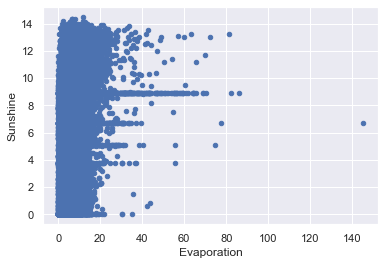

In [136]:
df_impute.plot.scatter("Evaporation", "Sunshine")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Evaporation', ylabel='MaxTemp'>

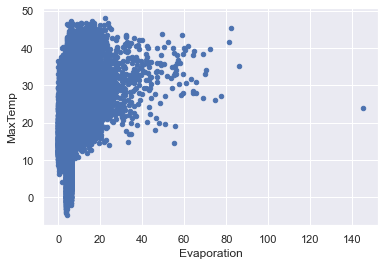

In [137]:
df_impute.plot.scatter("Evaporation", "MaxTemp")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Sunshine', ylabel='MaxTemp'>

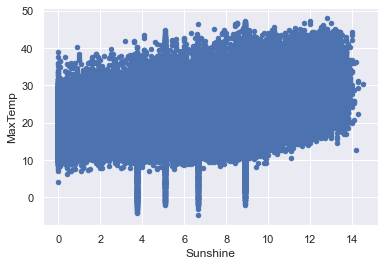

In [138]:
df_impute.plot.scatter("Sunshine", "MaxTemp")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Evaporation', ylabel='Cloud9am'>

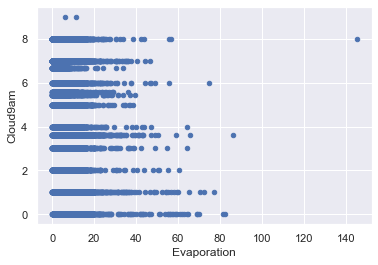

In [139]:
df_impute.plot.scatter("Evaporation", "Cloud9am")

(0.0, 38710.0)

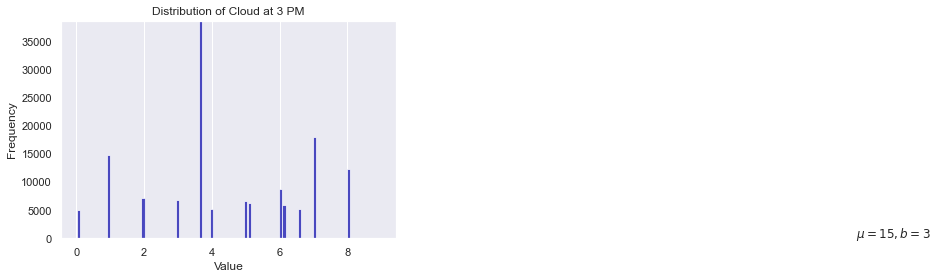

In [140]:

n, bins, patches = plt.hist(x=df_impute.Cloud3pm, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Cloud at 3 PM')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# Reference: https://realpython.com/python-histograms/

(0.0, 3240.0)

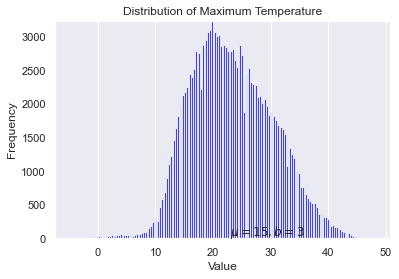

In [141]:

n, bins, patches = plt.hist(x=df_impute.MaxTemp, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Temperature')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

<AxesSubplot:xlabel='MinTemp', ylabel='Count'>

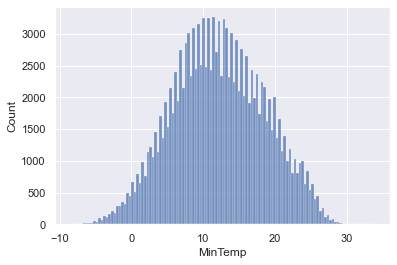

In [142]:
sns.set_style('darkgrid')
sns.histplot(df_impute.MinTemp)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

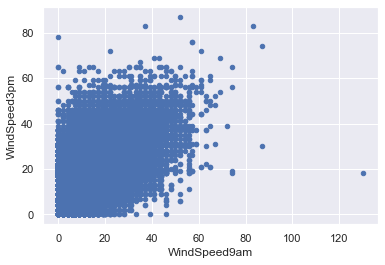

In [143]:
df_impute.plot.scatter("WindSpeed9am", "WindSpeed3pm")

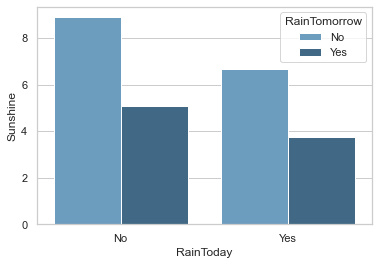

In [144]:
from numpy import median
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="RainToday", y="Sunshine", hue="RainTomorrow", data=df_impute, estimator=median,  palette="Blues_d")

# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

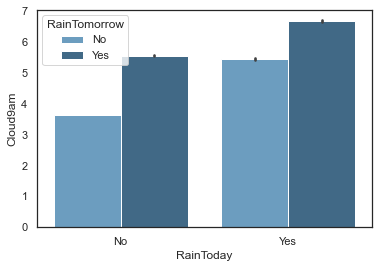

In [145]:
sns.set_theme(style="white")
ax = sns.barplot(x="RainToday", y="Cloud9am", hue="RainTomorrow", data=df_impute,  palette="Blues_d")

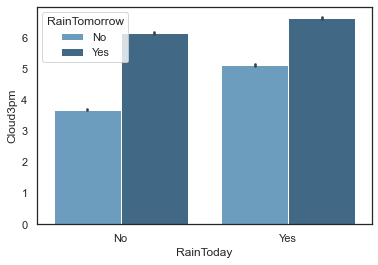

In [146]:
sns.set_theme(style="white")
ax = sns.barplot(x="RainToday", y="Cloud3pm", hue="RainTomorrow", data=df_impute,  palette="Blues_d")

## 5. Explore Joint Attributes

#### Correlation Matrix: 

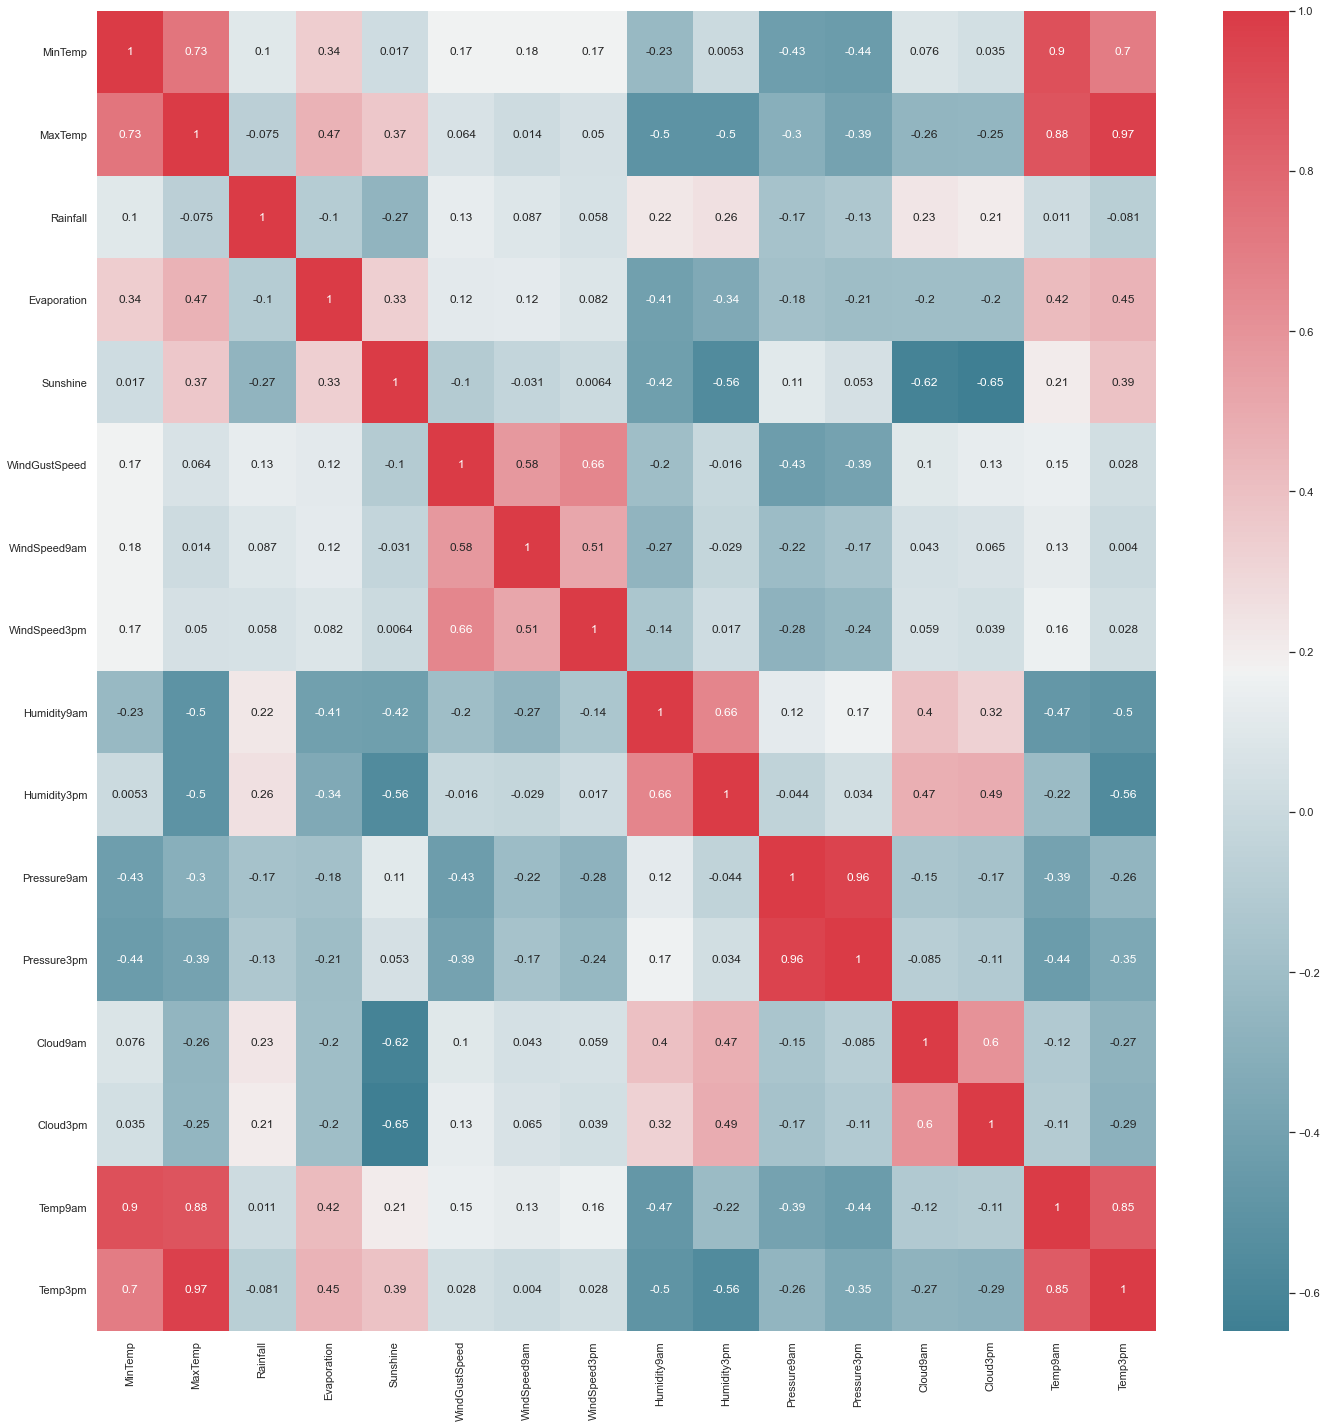

In [147]:
# plot the correlation matrix using seaborn

sns.set(style="darkgrid") # one of the many styles to plot using
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_impute.corr(), cmap=cmap, annot=True)

f.tight_layout()

In this correlation matrix, we notice some strong to mid positive correlations. There are some negative correlations but those are not significant (i.e. Cloud vs pressure). The strongest correlations we notice are in temperature attributes - min vs max temperature, am vs pm temperature, and am vs pm cloud attributes. Other than those attrubutes, here are some of the other pairs of positive correlations we notice between attributes:
evaporation and sunshine, Windspeed 9am vs Windspeed 3pm, and himidity vs cloud (am/pm).  

#### Cross-Tabulation:

In [148]:
# RainToday By State (first one) and RainTomorrow by State (second one)
df3 = pd.merge(df_impute, df2, on = 'WindGustDir')
Location_Windir_RainToday = pd.crosstab(df3['State'], df3['RainToday'])
Location_Windir_RainToday.div(Location_Windir_RainToday.sum(1),axis=0).plot.barh(stacked = True)

Location_Windir_Raintomorrow = pd.crosstab(df3['State'], df3['RainTomorrow'])
Location_Windir_Raintomorrow.div(Location_Windir_Raintomorrow.sum(1),axis=0).plot.barh(stacked = True)

NameError: name 'df2' is not defined

Explain

<AxesSubplot:ylabel='State'>

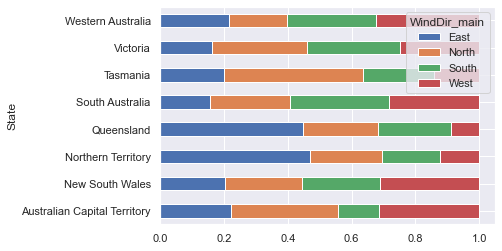

In [103]:
# WindDir By State
df3 = pd.merge(df_impute, df2, on = 'WindGustDir')
Location_Windir = pd.crosstab(df3['State'], df3['WindDir_main'])
Location_Windir.div(Location_Windir.sum(1),axis=0).plot.barh(stacked = True)


Explain

In [134]:
groupby_single = df_impute.groupby(['State']).agg({'Rainfall': ['mean', 'min', 'max']})
groupby_single

Rainfall            
                                  mean  min    max
State                                             
Australian Capital Territory  2.335164  0.0  107.6
New South Wales               2.739976  0.0  371.0
Northern Territory            2.676695  0.0  367.6
Queensland                    4.021798  0.0  278.4
South Australia               1.385510  0.0   84.6
Tasmania                      2.232459  0.0  156.8
Victoria                      1.682342  0.0  155.0
Western Australia             2.048591  0.0  114.4

In [ ]:
Explain

## 6.Explore Attributes and Class

In [118]:
df_impute2 = df_impute

df_impute2['AvgTemp'] = df_impute2[['MinTemp', 'MaxTemp']].mean(axis=1)

#Rainfall Vs Different Temperature Attributes

# Line plot for the effect of wind direction on rainfall 
WINdIR = ['E','ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=df_impute2.groupby('MinTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Minimum Temperature',
                         line_width=5.0,
                         )
             )
fig.add_trace(go.Scatter(y=df_impute2.groupby('MaxTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Maximum Temperature',
                         line_width=5.0,
                        )
             )
fig.add_trace(go.Scatter(y=df_impute2.groupby('AvgTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Average Temperature',
                         line_width=5.0,
                         )
             )

fig.update_layout(title='Rainfall vs Min/Max/Avg Temperature',
                  xaxis_title='Temperature [celsius]',
                  yaxis_title='Rainfall [mm]',
                  titlefont={'size': 28, 'family':'Serif'},
                  showlegend=True,
                  paper_bgcolor='lightgray',
                  plot_bgcolor='#999999',
                  width=750, height=500,
                 )
fig.show()

Explain

In [133]:
# Radar plot for differet temperature types on rainfall 
state = ['Australian Capital Territory','New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 
          'Tasmania', 'Victoria', 'Western Australia']

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Barpolar(r=df_impute2.groupby('MinTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Minimum Temperature'
                          )
             )
fig.add_trace(go.Barpolar(r=df_impute2.groupby('MaxTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Maximum Temperature'
                          )
             )
fig.add_trace(go.Barpolar(r=df_impute2.groupby('AvgTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Average Temperature'
                          )
             )

fig.update_layout(polar=dict(radialaxis=dict(visible=False,
                                             )
                             ),
                  showlegend=True,
                  title='Rainfall vs Temperature',
                  titlefont={'size': 28, 'family':'Serif'},
                  template='plotly_dark',
                  paper_bgcolor='gray',
                  width=600, height=500,
                 )
fig.show()

NameError: name 'df_impute2' is not defined

Explain

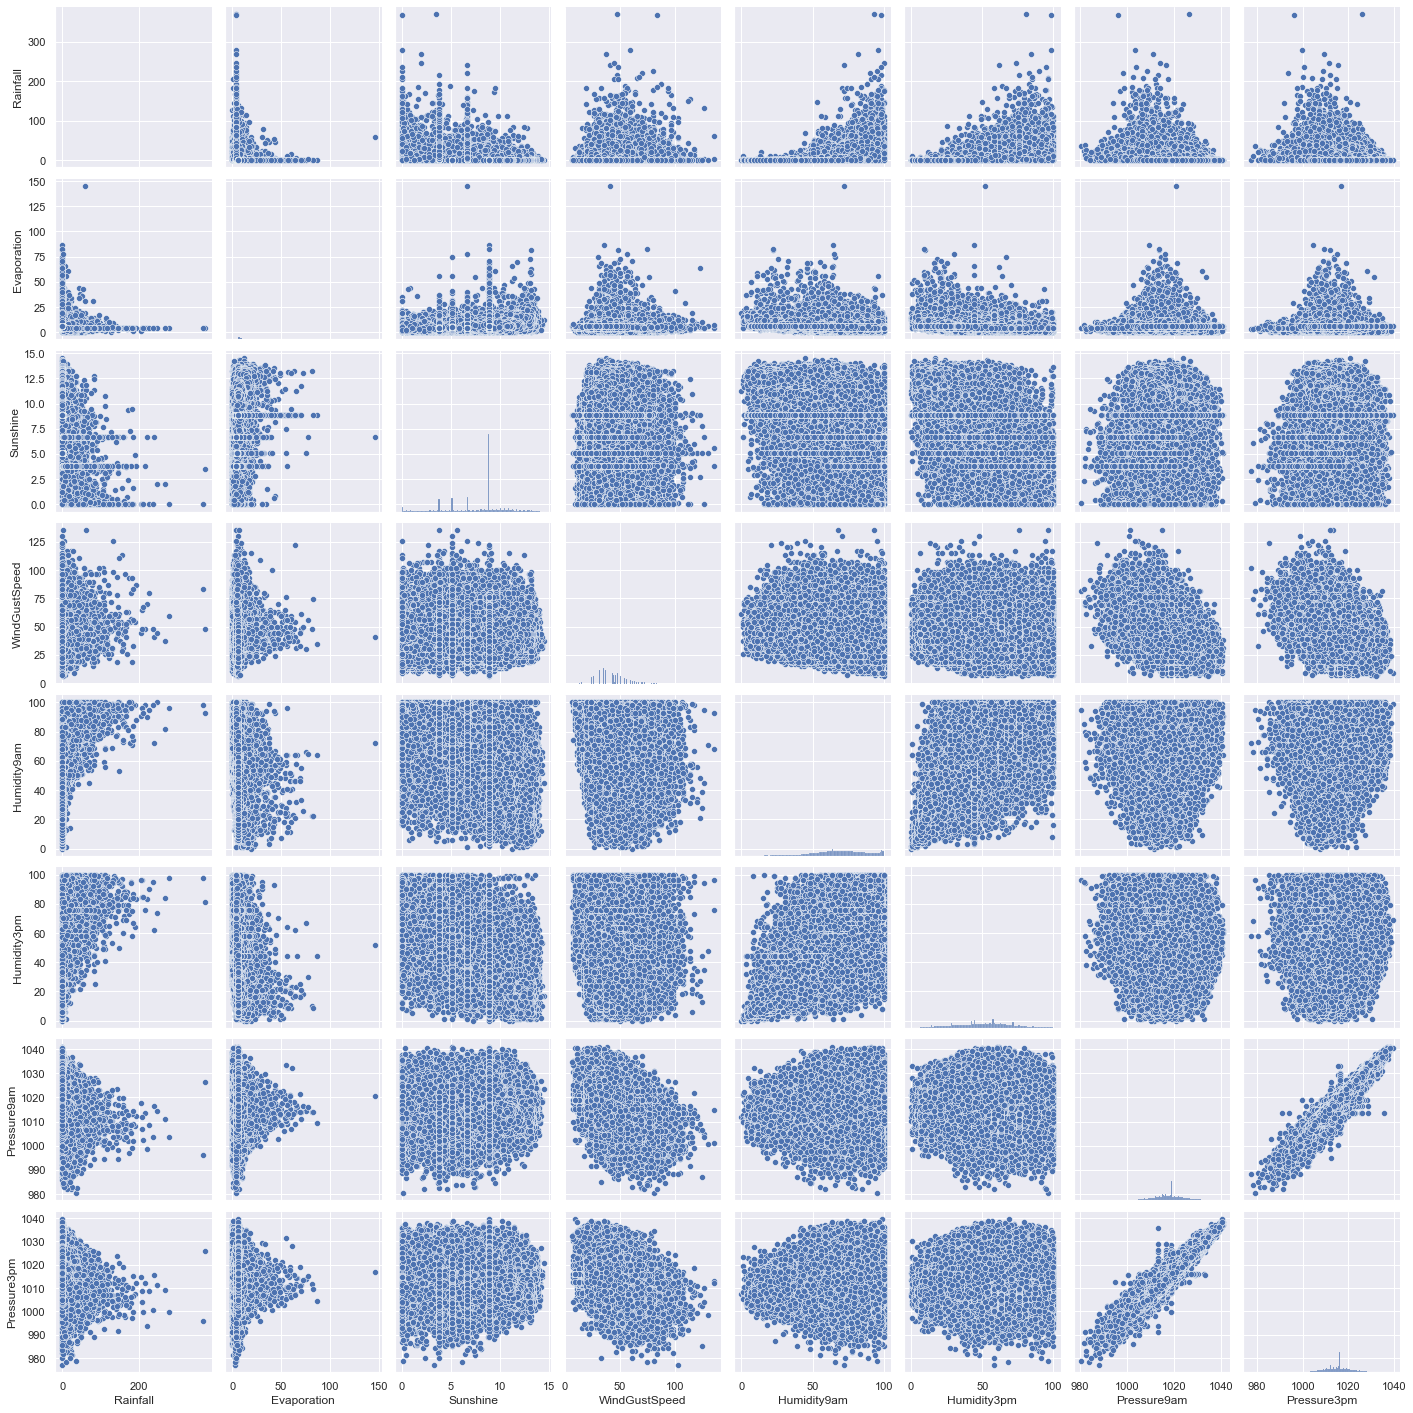

In [120]:
#Rainfall Vs Other Continuous Attributes 

sns.pairplot(df_impute[['Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
                       'Pressure9am', 'Pressure3pm']])

Explain

## 7.New Features

## 8. Exceptional Work

In [ ]:
df_impute_num = df.columns[df.dtypes == 'float64']
df_impute_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)

In [149]:
X=df_impute[df_num]
y = df.RainTomorrow

In [150]:
print('features shape:', X.shape) 
print('target shape:', y.shape )

features shape: (140787, 16)
target shape: (140787,)


Cumulative Explained variance of components: 1.0000000000000002


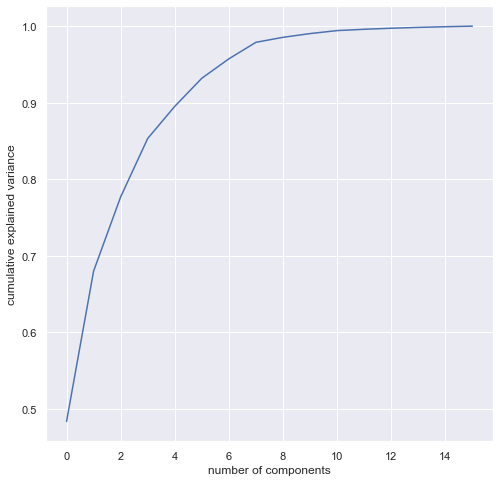

In [151]:
from sklearn.decomposition import PCA
def plot_pca(X):
    # Perform PCA on the data to reduce the number of initial features 
     
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)
    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance of components:',sum(pca.explained_variance_ratio_[0:199]) )
plot_pca(X)



# https://github.com/jakemdrew/DataMiningNotebooks/blob/master/03.%20Dimension%20Reduction.ipynb